# Wearable Device Dataset from Induced Stress and Structured Exercise Sessions Data Exploration

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob

In [18]:
subject_info = pd.read_csv('data/subject-info.csv')

In [19]:
subject_info

,Info,Gender,Age,Height (cm),Weight (kg),Does physical activity regularly?,Protocol,Stress Inducement,Aerobic Exercise,Anaerobic Exercise
0,S01,m,21,192,84,Yes,V1,Yes,Yes,Yes****
1,S02,m,20,185,95,No,V1,Yes****,Yes,Yes
2,S03,m,20,175,62,Yes,V1,Yes,Yes***,Yes
3,S04,m,21,174,70,Yes,V1,Yes,Yes,Yes
4,S05,m,21,173,72,Yes,V1,Yes,Yes,Yes
5,S06,m,21,172,70,Yes,V1,Yes,Yes,Yes***
6,S07,m,19,184,88,Yes,V1,Yes,Yes***,Yes
7,S08,m,20,174,67,Yes,V1,Yes,Yes,Yes
8,S09,m,19,174,63,Yes,V1,Yes,Yes,Yes
9,S10,m,21,180,80,Yes,V1,Yes,Yes,Yes


In [22]:
# Dropped the last 14 rows b/c they are not relevant to the analysis

subject_info = subject_info.drop(range(31, len(subject_info)), axis=0)

In [23]:
subject_info

,Info,Gender,Age,Height (cm),Weight (kg),Does physical activity regularly?,Protocol,Stress Inducement,Aerobic Exercise,Anaerobic Exercise
0,S01,m,21,192,84,Yes,V1,Yes,Yes,Yes****
1,S02,m,20,185,95,No,V1,Yes****,Yes,Yes
2,S03,m,20,175,62,Yes,V1,Yes,Yes***,Yes
3,S04,m,21,174,70,Yes,V1,Yes,Yes,Yes
4,S05,m,21,173,72,Yes,V1,Yes,Yes,Yes
5,S06,m,21,172,70,Yes,V1,Yes,Yes,Yes***
6,S07,m,19,184,88,Yes,V1,Yes,Yes***,Yes
7,S08,m,20,174,67,Yes,V1,Yes,Yes,Yes
8,S09,m,19,174,63,Yes,V1,Yes,Yes,Yes
9,S10,m,21,180,80,Yes,V1,Yes,Yes,Yes


In [37]:
# Define the base directory containing the three session folders
base_dir = 'data/Wearable_Dataset'
sessions = ['AEROBIC', 'ANAEROBIC', 'STRESS']

In [38]:
# Initialize an empty DataFrame for the merged data
master_df = pd.DataFrame()

In [48]:
def load_data(file_path, signal_type):
    """Load data from a file and format it correctly based on the signal type."""
    try:
        df = pd.read_csv(file_path, header=None)
    except pd.errors.EmptyDataError:
        print(f"Empty file skipped: {file_path}")
        return pd.DataFrame()

    num_columns = df.shape[1]
    
    if signal_type == 'ACC':
        # Skip the first row (timestamps) and parse the accelerometer data
        df = df.iloc[1:]  # Remove the header row with repeated timestamps
        df.columns = ['acc_x', 'acc_y', 'acc_z']
        df.reset_index(drop=True, inplace=True)
        df['timestamp'] = pd.date_range(start=pd.read_csv(file_path, header=None).iloc[0, 0], periods=len(df), freq='S')
    
    elif signal_type == 'IBI':
        # First two rows are datetime stamps, the rest are IBI data
        start_time = pd.read_csv(file_path, header=None).iloc[0, 0]
        df = df.iloc[2:]  # Skip the first two rows
        df.columns = ['ibi', 'amplitude']
        df.reset_index(drop=True, inplace=True)
        df['timestamp'] = pd.date_range(start=start_time, periods=len(df), freq='S')

    elif signal_type in ['bvp', 'eda', 'hr', 'temp', 'tags'] and num_columns == 2:
        df.columns = ['timestamp', signal_type]
        df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')

    elif num_columns == 1:  # Handle single-column files (like tags without timestamps)
        df.columns = [signal_type]
        df['timestamp'] = pd.NaT
    
    else:
        print(f"Unexpected format in file: {file_path}")
        return pd.DataFrame()
    
    return df.dropna(subset=['timestamp'])

for session in sessions:
    session_path = os.path.join(base_dir, session)
    subjects = os.listdir(session_path)
    
    for subject in subjects:
        subject_path = os.path.join(session_path, subject)
        signal_files = glob.glob(f"{subject_path}/*.csv")
        
        subject_df = pd.DataFrame()
        for file in signal_files:
            signal_type = os.path.basename(file).split('.')[0]
            signal_df = load_data(file, signal_type)
            if not signal_df.empty:
                if subject_df.empty:
                    subject_df = signal_df
                else:
                    subject_df = pd.merge_asof(
                        subject_df.sort_values('timestamp'), 
                        signal_df.sort_values('timestamp'), 
                        on='timestamp', 
                        direction='nearest'
                    )
        
        if not subject_df.empty:
            subject_df['subject_id'] = subject
            subject_df['session_type'] = session
            master_df = pd.concat([master_df, subject_df], ignore_index=True)

C:\Users\lamet\AppData\Local\Temp\ipykernel_26720\1945341092.py:16: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df['timestamp'] = pd.date_range(start=pd.read_csv(file_path, header=None).iloc[0, 0], periods=len(df), freq='S')
C:\Users\lamet\AppData\Local\Temp\ipykernel_26720\1945341092.py:24: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df['timestamp'] = pd.date_range(start=start_time, periods=len(df), freq='S')
C:\Users\lamet\AppData\Local\Temp\ipykernel_26720\1945341092.py:16: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df['timestamp'] = pd.date_range(start=pd.read_csv(file_path, header=None).iloc[0, 0], periods=len(df), freq='S')
C:\Users\lamet\AppData\Local\Temp\ipykernel_26720\1945341092.py:24: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df['timestamp'] = pd.date

Empty file skipped: data/Wearable_Dataset\ANAEROBIC\S01\IBI.csv


C:\Users\lamet\AppData\Local\Temp\ipykernel_26720\1945341092.py:16: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df['timestamp'] = pd.date_range(start=pd.read_csv(file_path, header=None).iloc[0, 0], periods=len(df), freq='S')
C:\Users\lamet\AppData\Local\Temp\ipykernel_26720\1945341092.py:24: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df['timestamp'] = pd.date_range(start=start_time, periods=len(df), freq='S')
C:\Users\lamet\AppData\Local\Temp\ipykernel_26720\1945341092.py:16: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df['timestamp'] = pd.date_range(start=pd.read_csv(file_path, header=None).iloc[0, 0], periods=len(df), freq='S')
C:\Users\lamet\AppData\Local\Temp\ipykernel_26720\1945341092.py:24: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df['timestamp'] = pd.date

Empty file skipped: data/Wearable_Dataset\STRESS\f14_a\tags.csv


C:\Users\lamet\AppData\Local\Temp\ipykernel_26720\1945341092.py:16: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df['timestamp'] = pd.date_range(start=pd.read_csv(file_path, header=None).iloc[0, 0], periods=len(df), freq='S')
C:\Users\lamet\AppData\Local\Temp\ipykernel_26720\1945341092.py:24: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df['timestamp'] = pd.date_range(start=start_time, periods=len(df), freq='S')
C:\Users\lamet\AppData\Local\Temp\ipykernel_26720\1945341092.py:16: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df['timestamp'] = pd.date_range(start=pd.read_csv(file_path, header=None).iloc[0, 0], periods=len(df), freq='S')
C:\Users\lamet\AppData\Local\Temp\ipykernel_26720\1945341092.py:24: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df['timestamp'] = pd.date

In [49]:
master_df

,acc_x,acc_y,acc_z,timestamp,ibi,amplitude,subject_id,session_type
0,32.0,32.0,32.0,2013-07-04 12:06:34,166.625,0.906250,f01,AEROBIC
1,-30.0,-19.0,46.0,2013-07-04 12:06:35,167.40625,0.781250,f01,AEROBIC
2,-11.0,-21.0,62.0,2013-07-04 12:06:36,197.375,0.859375,f01,AEROBIC
3,-7.0,-12.0,61.0,2013-07-04 12:06:37,205.25,0.875000,f01,AEROBIC
4,-12.0,-17.0,67.0,2013-07-04 12:06:38,216.46875,0.500000,f01,AEROBIC
...,...,...,...,...,...,...,...,...
6685601,-55.0,-4.0,-34.0,2013-02-26 09:47:20,1611.953125,0.875000,S18,STRESS
6685602,-65.0,-1.0,-30.0,2013-02-26 09:47:21,1611.953125,0.875000,S18,STRESS
6685603,-59.0,19.0,-22.0,2013-02-26 09:47:22,1611.953125,0.875000,S18,STRESS
6685604,-51.0,4.0,-14.0,2013-02-26 09:47:23,1611.953125,0.875000,S18,STRESS


## Data Dictionary for master_df

### Accelerometer (ACC)

* acc_x: Acceleration along the X-axis (in milligravity units, mg). Represents movement or tilt in the horizontal direction.

* acc_y: Acceleration along the Y-axis (in milligravity units, mg). Represents movement or tilt in the vertical direction.

* acc_z: Acceleration along the Z-axis (in milligravity units, mg). Represents movement or tilt in the depth direction.

### Interbeat Interval (IBI)

* ibi: Time between successive heartbeats (in milliseconds, ms). Used to calculate heart rate variability.

* amplitude: The amplitude of the IBI signal, which may reflect the strength or intensity of the heartbeat.

### General

* timestamp: The time at which the signal was recorded. Format: YYYY-MM-DD HH:MM:SS.

* subject_id: Unique identifier for each subject participating in the study.

* session_type: Type of session during data collection ("aerobic", "anaerobic", "stress").

- Aerobic excerise = Sustained, moderate-intensity exercise
- Anaerobic excerise = Short bursts of high-intensity effort (like sprinting or weightlifting)
- Stress session = Induced stress through mental tasks, public speaking, or other controlled stimuli

* This dictionary can be expanded as we integrate more signals like BVP, EDA, HR, TEMP, and TAGS. Let me know if you want to add details about how the data was collected or processed!



In [64]:
master_df
master_df['ibi'] = pd.to_numeric(master_df['ibi'], errors='coerce')

In [65]:
master_df.groupby('session_type')['ibi'].describe()

,count,mean,std,min,25%,50%,75%,max
session_type,,,,,,,,
AEROBIC,2026536.0,2089.567151,428.718625,10.562500,1906.343750,2021.078125,2424.500000,2981.250000
ANAEROBIC,1564969.0,1784.420758,690.009728,10.546875,1136.875000,1739.296875,2477.421875,2786.078125
STRESS,2976901.0,2759.028755,1061.202240,10.859375,1611.953125,3083.984375,3389.453125,4784.312500


In [66]:
df_sampled = master_df.sample(n=50000, random_state=42)
df_sampled['ibi'] = df_sampled['ibi'].astype(float)

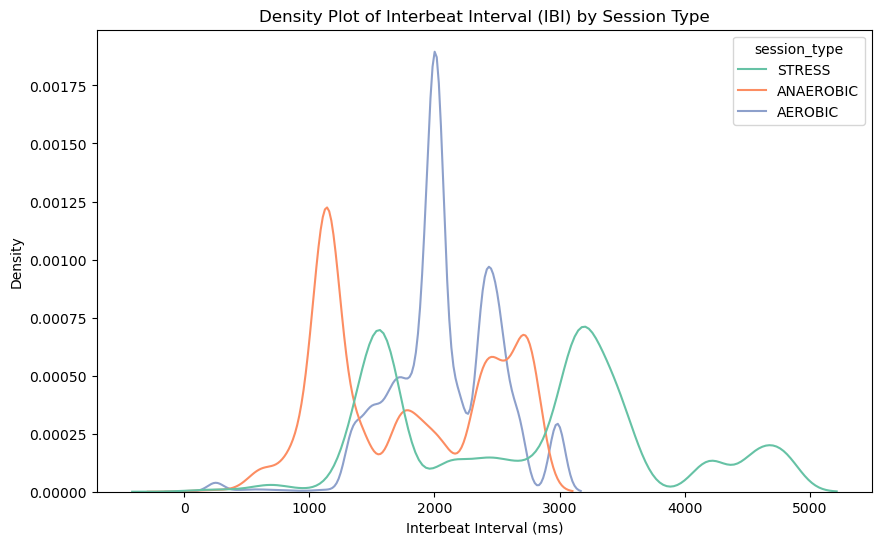

In [67]:
df_sampled = master_df.sample(n=50000, random_state=42)

plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_sampled, x='ibi', hue='session_type', common_norm=False, palette='Set2')

plt.title('Density Plot of Interbeat Interval (IBI) by Session Type')
plt.xlabel('Interbeat Interval (ms)')
plt.ylabel('Density')
plt.show()